# Operations Research 3: Examples for Theory

This code is for students who take the class Operations Research. Students should finish the installation of Gurobi and Python before workersed and make sure an academic liscense for Gurobi is applied and activated.

We introduce two examples for gradient descent in order to help students understand how to implement theories introduced in lectures with codes. More instruction is provided in the lecture video.

# Gradient Descent
In this part, we try to use gradient descent to find out solution for quadratic equation with two variables.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def y_value(coef, x1, x2):
    # plug in x values into the polynomial fuction to calculate y
    
    n = len(coef)
    
    y_list = []
    for i in range(n):
        m = len(coef[i])
        for j in range(m):
            temp_y = coef[i][j] * (x1 ** j) * (x2 ** i)
            y_list.append(temp_y)
            
    
    y = sum(y_list)
    
    return y

In [3]:
def max_step(coef, init, gradient):
    # calculate the step of moving to minimum value in the iteration
    
    a_coef = [0, 0, 0]
    
    a_coef[0] = coef[0][2] * init[0] ** 2 + coef[0][1] * init[0] + coef[0][0] + coef[1][0] * init[1] + \
                coef[1][1] * init[0] * init[1] + coef[2][0] * init[1] ** 2
    
    a_coef[1] = - (2 * coef[0][2] * init[0] * gradient[0] + coef[0][1] * gradient[0] + coef[1][0] * gradient[1] + 
                  2 * coef[2][0] * init[1] * gradient[1] + coef[1][1] * (init[0] * gradient[1] + init[1] * gradient[0]))
    a_coef[2] = coef[0][2] * gradient[0] ** 2 + coef[1][1] * gradient[0] * gradient[1] + coef[2][0] * gradient[1] ** 2
    
    a_gradient = [a_coef[1], 2 * a_coef[2]]
    
    a = (- a_gradient[0]) / a_gradient[1]

    
    return a

In [7]:
def poly_gd(coef, init, iteration, threshold):
    # implement gradient decent
    
    """Calculate gradient"""
    n = len(coef) - 1
    
    # partial x1
    gradient_x1 = []
    for i in range(n):
        m = len(coef[i]) - 1
        temp_x1 = []
        for j in range(m):
            temp_x1.append((j + 1) * coef[i][j + 1])
        gradient_x1.append(temp_x1)
        
    print(gradient_x1)
        
    
    # partial x2
    gradient_x2 = []
    for i in range(n):
        m = len(coef[i + 1]) 
        temp_x2 = []
        for j in range(m):
            temp_x2.append((i + 1) * coef[i + 1][j])
        gradient_x2.append(temp_x2)
        
    print(gradient_x2)

    
    
    """Gradient descent"""
    
    X = init.copy()
    y = y_value(coef, init[0], init[1])
    
    
    x1_list = [X[0]]
    x2_list = [X[1]]
    
    for i in range(iteration):
        # calculate the moving step of this iteration
        init_gradient = [y_value(gradient_x1, X[0], X[1]), y_value(gradient_x2, X[0], X[1])]
        a = max_step(coef, X, init_gradient)
        
        # x1, x2, y after moving
        x1 = X[0] - a*y_value(gradient_x1, X[0], X[1])
        x2 = X[1] - a*y_value(gradient_x2, X[0], X[1])
        new_y = y_value(coef, x1, x2)
        new_gradient = [y_value(gradient_x1, x1, x2), y_value(gradient_x2, x1, x2)]
        
        x1_list.append(x1)
        x2_list.append(x2)
        
        X = [x1, x2]
        y = new_y
        
        
        
        
        # the stop rule 
        if math.sqrt(new_gradient[0]**2 + new_gradient[1]**2) < threshold:
            print('The loop ends when {i} iteration.'.format(i = i))
            break
        else:
            pass
    
    


    """Visualization"""
    fig, ax1 = plt.subplots(figsize = (8, 8), dpi = 200)
    ax2 = ax1.twinx()
    
    
    # illustrate the search path of the function
    ax2.plot(x1_list, x2_list, 'b-o')
    
    minimum = np.min((ax2.get_xlim(),ax2.get_ylim()))
    maximum = np.max((ax2.get_xlim(),ax2.get_ylim()))
    ax2.set_ylim(minimum*1.2,maximum*1.2)
    
    


    #illustrate the contuor map of the function
    g_x1 = np.arange(minimum*1.2, maximum*1.2, (maximum - minimum)*1.2/100)
    g_x2 = np.arange(minimum*1.2, maximum*1.2, (maximum - minimum)*1.2/100)
    g_X1, g_X2 = np.meshgrid(g_x1, g_x2)
    Y = y_value(coef, g_X1, g_X2)

    ax1.set_title('Contour map and the seach path of the function', fontsize = 16)
    ax1.set_xlim(minimum*1.2,maximum*1.2)
    ax1.set_ylim(minimum*1.2,maximum*1.2)
    ax1.set_xlabel('x1', fontsize = 14)
    ax1.set_ylabel('x2', fontsize = 14)
    
    contour = ax1.contour(g_X1, g_X2, Y, levels = 15)
    
    # add y values on contuor lines
    ax1.clabel(contour, inline=True, fontsize=12, colors='black')
    
    
    fig.tight_layout()
    plt.show()
    
    
        
    return X, y
        

[[2, 2], [-2]]
[[0, -2], [4]]
The loop ends when 35 iteration.


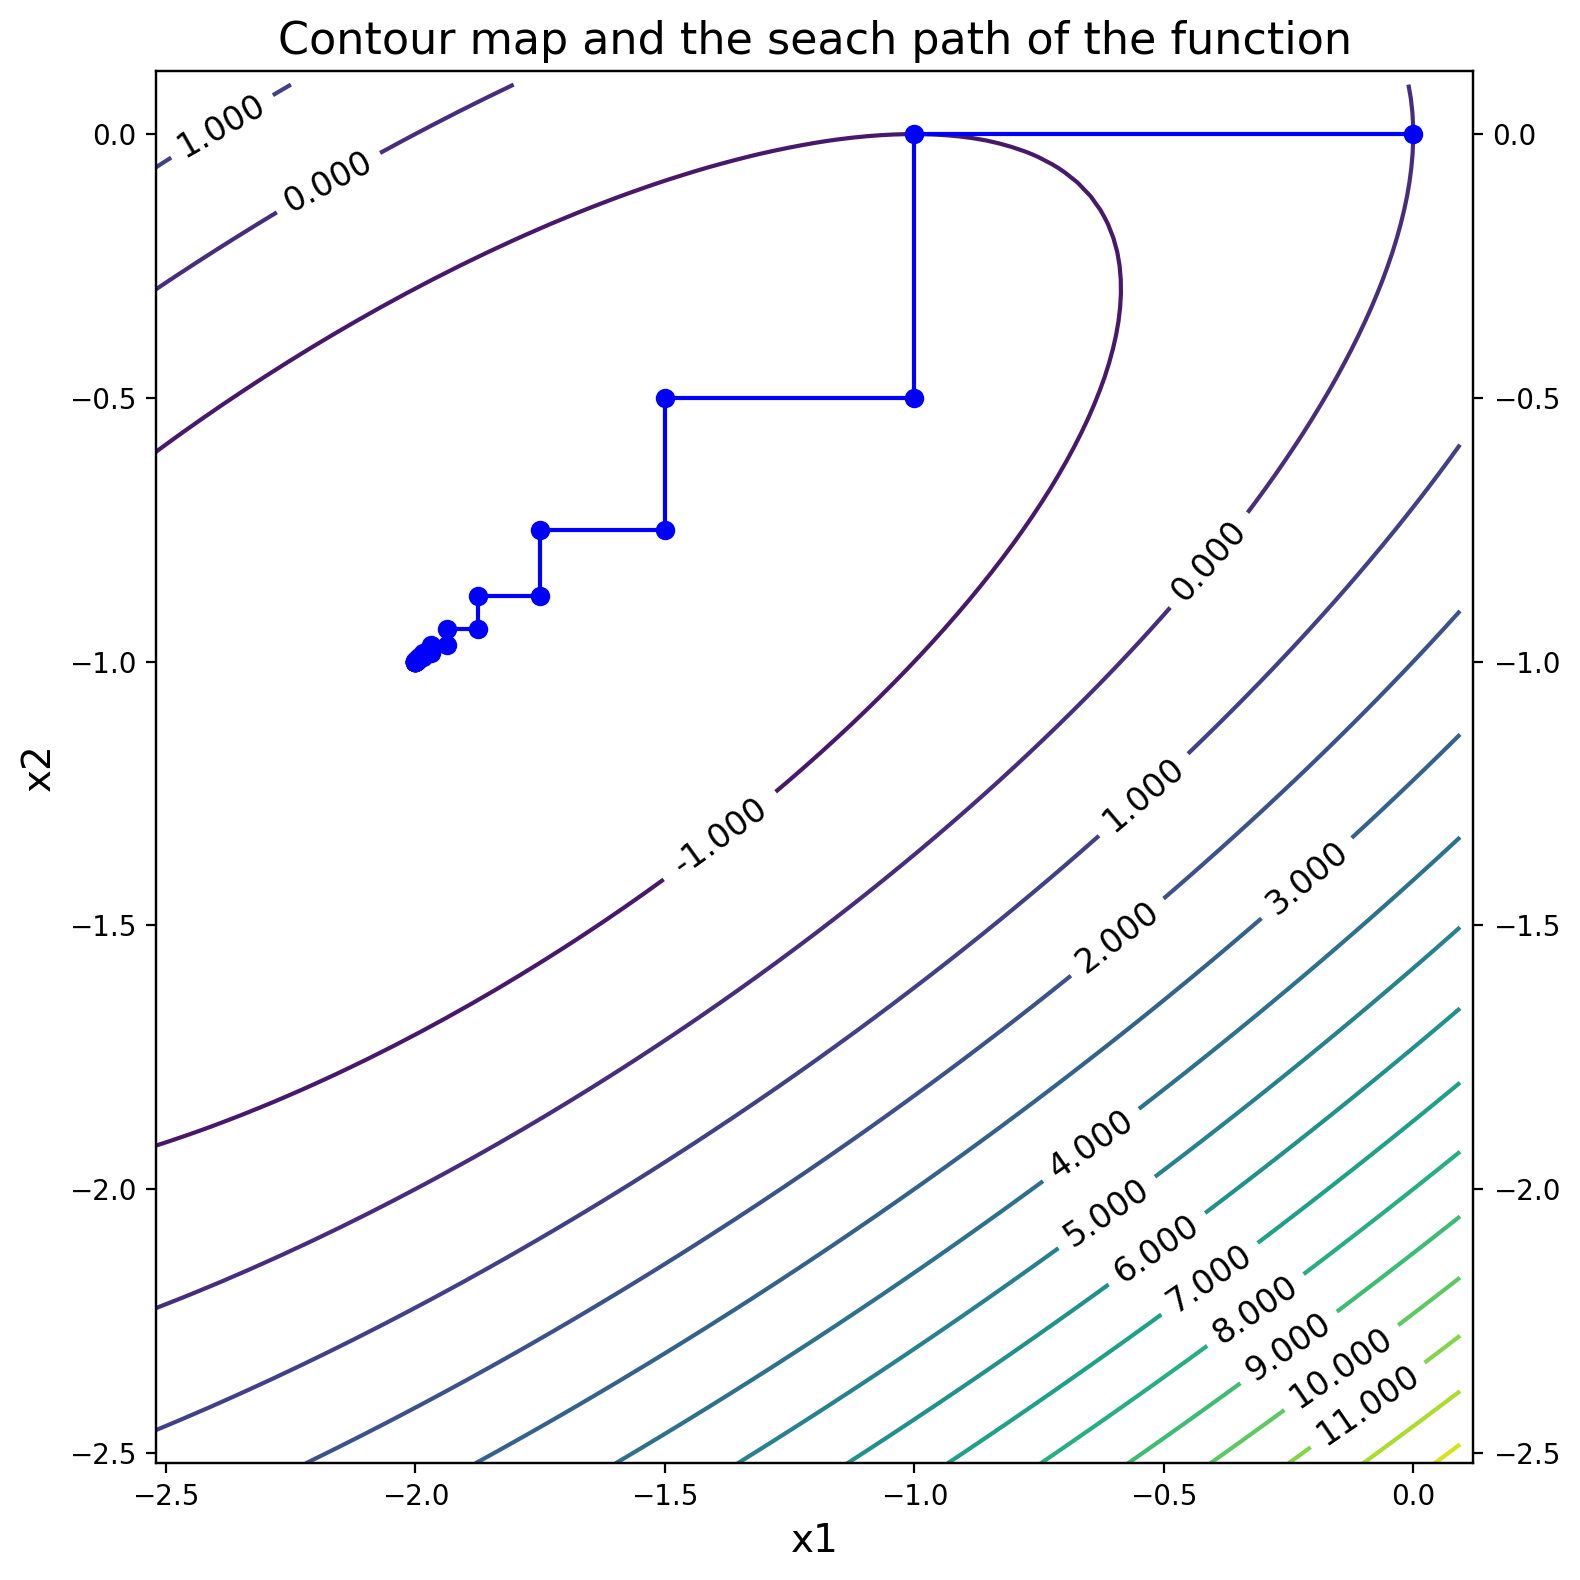

When (x1, x2) = (-2.0, -1.0), the function has minimum -2.0.


In [8]:
poly_coef = [[0, 2, 1], 
             [0, -2], 
             [2]]

X, y = poly_gd(poly_coef, [0, 0], 100, 0.00001)
print('When (x1, x2) = {vec}, the function has minimum {sol}.'.format(vec = (round(X[0], 4), round(X[1], 4)), sol = round(y, 4)))

[[-4, 8], [2]]
[[-20, 2], [10]]
The loop ends when 12 iteration.


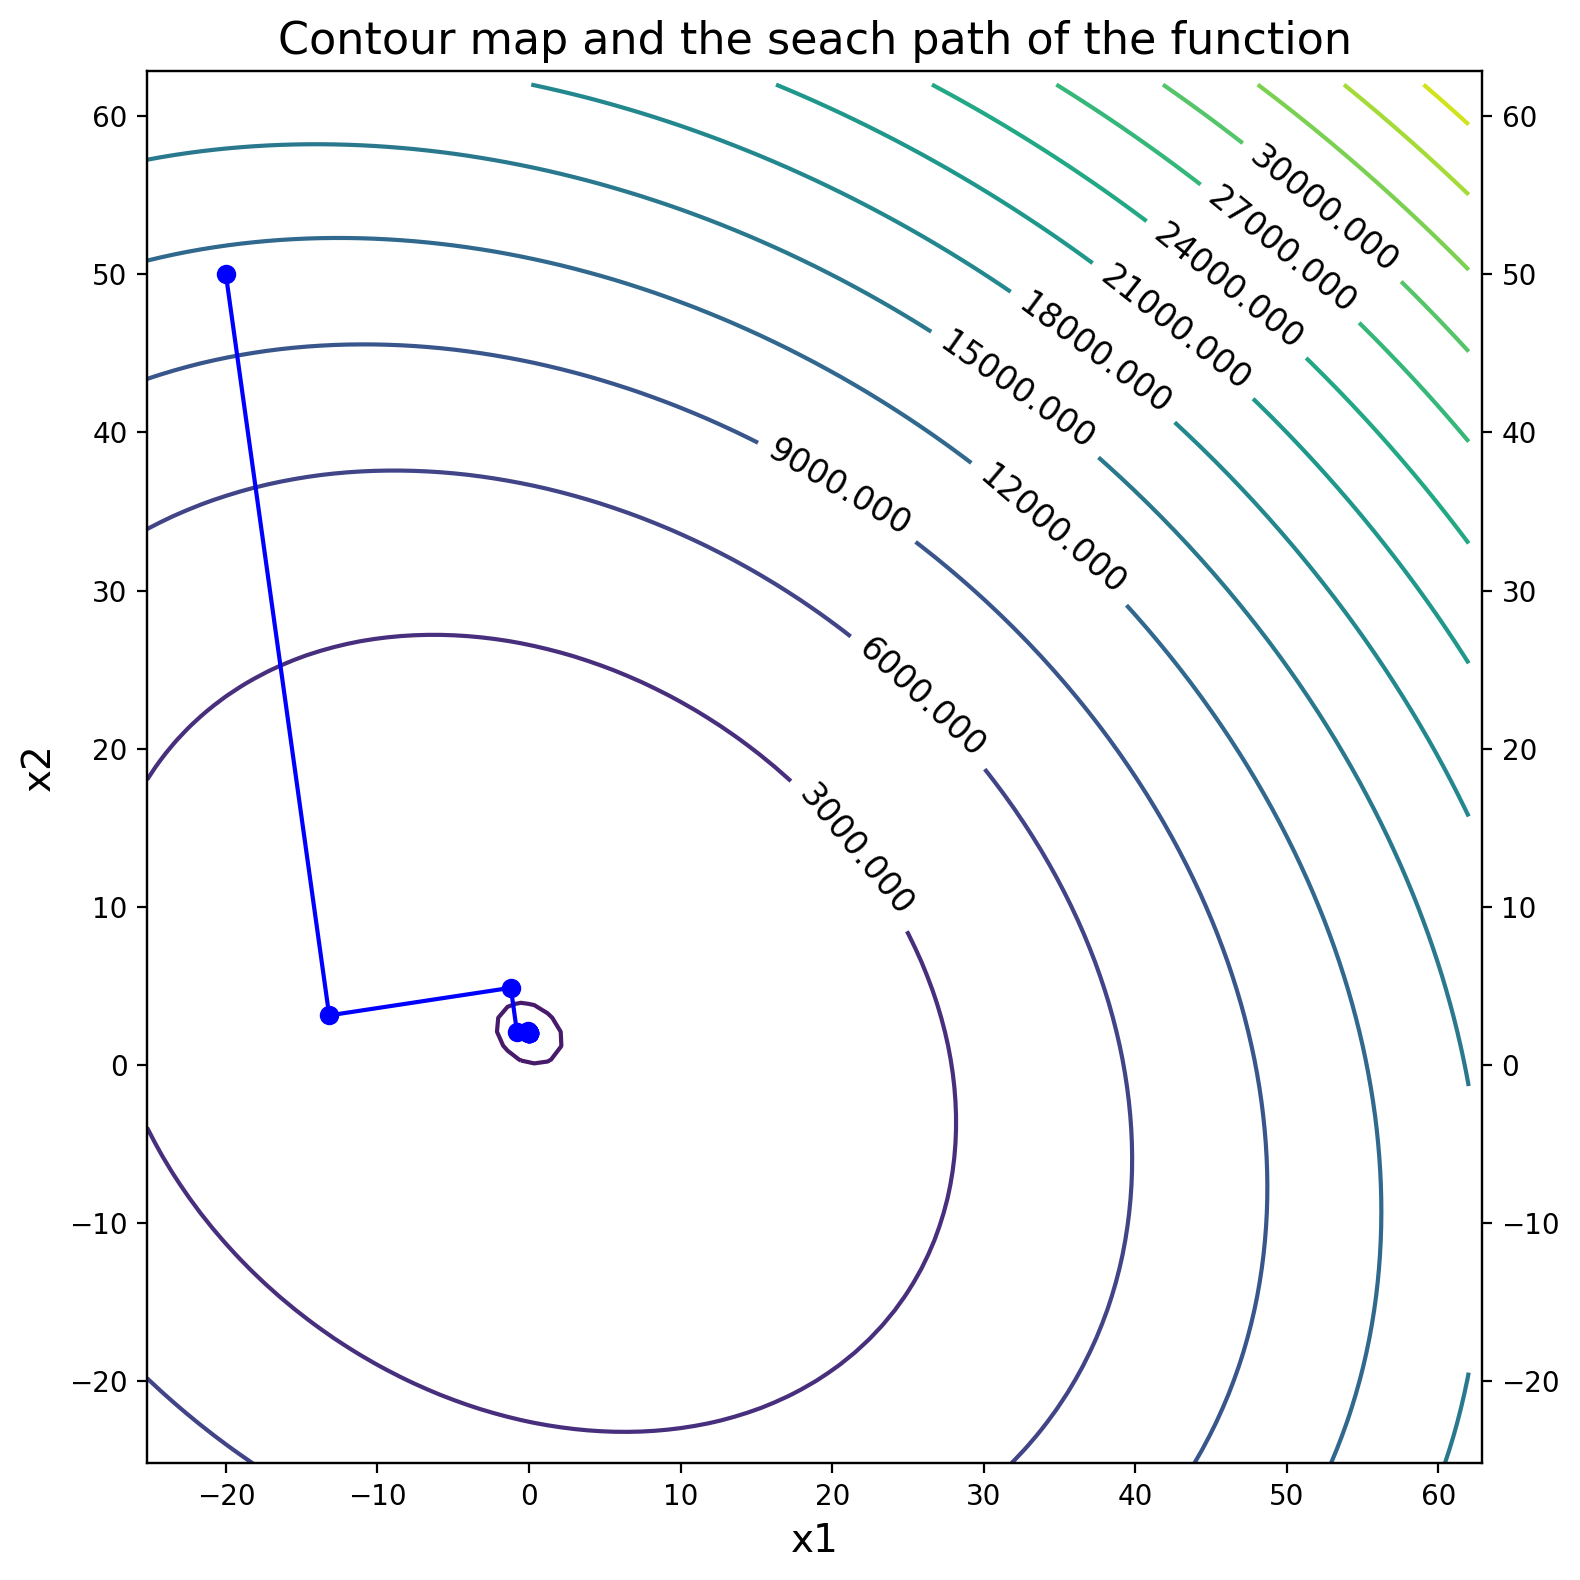

When (x1, x2) = (-0.0, 2.0), the function has minimum -18.0.


In [9]:
poly2_coef = [[2, -4, 4], 
             [-20, 2], 
             [5]]

X2, y2 = poly_gd(poly2_coef, [-20, 50], 100, 0.00001)
print('When (x1, x2) = {vec}, the function has minimum {sol}.'.format(vec = (round(X2[0], 4), round(X2[1], 4)), sol = round(y2, 4)))